#Thông tin sinh viên:

Tên: Huỳnh Võ Ngọc Thanh

MSSV: 21520449

BaiThucHanh4

In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

0: negative

1: neutral

2: positive


In [2]:
def read_data(path: str) -> list:
    with open(path) as file:
        lines = file.readlines()

    data = [line.strip() for line in lines]
    return data

In [3]:
train_sents = read_data("/content/drive/MyDrive/DS102_Lab4/UIT-VSFC/train/sents.txt")
train_sentiments = read_data("/content/drive/MyDrive/DS102_Lab4/UIT-VSFC/train/sentiments.txt")

In [4]:
sentiment2class = {'0': "Negative", '1': "Neutral", '2': "Positive"}

for sent, sentiment in zip(train_sents[:5], train_sentiments[:5]):
  print(f"Sentence: {sent}")
  print(f"=> {sentiment2class[sentiment]}\n")

Sentence: slide giáo trình đầy đủ .
=> Positive

Sentence: nhiệt tình giảng dạy , gần gũi với sinh viên .
=> Positive

Sentence: đi học đầy đủ full điểm chuyên cần .
=> Negative

Sentence: chưa áp dụng công nghệ thông tin và các thiết bị hỗ trợ cho việc giảng dạy .
=> Negative

Sentence: thầy giảng bài hay , có nhiều bài tập ví dụ ngay trên lớp .
=> Positive



In [5]:
len(train_sents)

11426

In [6]:
test_sents = read_data("/content/drive/MyDrive/DS102_Lab4/UIT-VSFC/test/sents.txt")
test_sentiments = read_data("/content/drive/MyDrive/DS102_Lab4/UIT-VSFC/test/sentiments.txt")

In [7]:
for sent, sentiment in zip(test_sents[:5], test_sentiments[:5]):
  print(f"Sentence: {sent}")
  print(f"=> {sentiment2class[sentiment]}\n")

Sentence: nói tiếng anh lưu loát .
=> Positive

Sentence: giáo viên rất vui tính .
=> Positive

Sentence: cô max có tâm .
=> Positive

Sentence: giảng bài thu hút , dí dỏm .
=> Positive

Sentence: giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Negative



In [8]:
len(test_sents)

3166

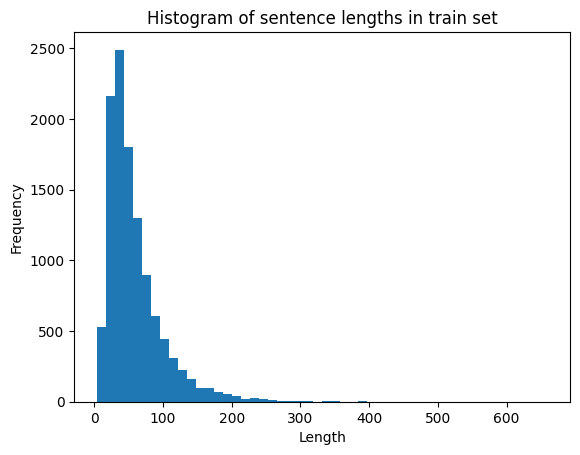

In [9]:
# Vẽ histogram để lấy max_len
lengths_s = [len(s) for s in train_sents]

plt.hist(lengths_s, bins=50)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Histogram of sentence lengths in train set")
plt.show()

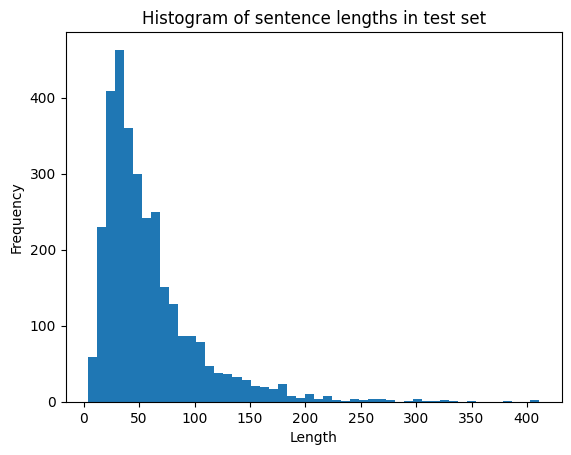

In [10]:
# Vẽ histogram để lấy max_len
lengths_s = [len(s) for s in test_sents]

plt.hist(lengths_s, bins=50)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Histogram of sentence lengths in test set")
plt.show()

#Bài 1: Mã hoá văn bản bằng kỹ thuật Counting. Huấn luyện các phương pháp Hồi quy Softmax, Naive Bayes và SVM. Sử dụng các độ đo accuracy, precision, recall và F1 để đánh giá các mô hình huấn luyện được.

In [11]:
# Word Count vectorizer
cv = CountVectorizer()
cv = cv.fit(train_sents + test_sents)

In [12]:
cv.vocabulary_

{'slide': 1631,
 'giáo': 630,
 'trình': 1907,
 'đầy': 2637,
 'đủ': 2689,
 'nhiệt': 1310,
 'tình': 1979,
 'giảng': 642,
 'dạy': 535,
 'gần': 689,
 'gũi': 682,
 'với': 2154,
 'sinh': 1624,
 'viên': 2088,
 'đi': 2569,
 'học': 821,
 'full': 601,
 'điểm': 2571,
 'chuyên': 244,
 'cần': 424,
 'chưa': 281,
 'áp': 2544,
 'dụng': 564,
 'công': 397,
 'nghệ': 1245,
 'thông': 1787,
 'tin': 1848,
 'và': 2103,
 'các': 383,
 'thiết': 1739,
 'bị': 189,
 'hỗ': 834,
 'trợ': 1944,
 'cho': 238,
 'việc': 2093,
 'thầy': 1813,
 'bài': 132,
 'hay': 715,
 'có': 395,
 'nhiều': 1305,
 'tập': 2021,
 'ví': 2114,
 'dụ': 562,
 'ngay': 1230,
 'trên': 1905,
 'lớp': 1096,
 'đảm': 2631,
 'bảo': 172,
 'thời': 1834,
 'gian': 618,
 'lên': 1032,
 'tích': 1981,
 'cực': 457,
 'trả': 1925,
 'lời': 1098,
 'câu': 391,
 'hỏi': 825,
 'của': 450,
 'thường': 1801,
 'xuyên': 2505,
 'đặt': 2651,
 'em': 576,
 'sẽ': 1694,
 'nợ': 1423,
 'môn': 1165,
 'này': 1385,
 'nhưng': 1336,
 'lại': 1058,
 'kỳ': 974,
 'kế': 969,
 'tiếp': 1858,
 'lượng

In [13]:
#Convert sentences into vectors:
X_train_wc = cv.transform(train_sents).toarray()
X_test_wc = cv.transform(test_sents).toarray()

In [14]:
X_train_wc.shape

(11426, 2718)

In [15]:
X_test_wc.shape

(3166, 2718)

In [16]:
#Convert labels into vectors:
y_train = np.array(train_sentiments)
y_test = np.array(test_sentiments)

In [17]:
y_train

array(['2', '2', '0', ..., '0', '2', '2'], dtype='<U1')

#Softmax Regression with Counting:

In [18]:
sm_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
sm_model.fit(X_train_wc, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [19]:
sm_y_pred = sm_model.predict(X_test_wc)

In [20]:
sm_metrics = classification_report(y_test, sm_y_pred)
print("Đánh giá mô hình Softmax Regression:\n", sm_metrics)

Đánh giá mô hình Softmax Regression:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1409
           1       0.49      0.22      0.30       167
           2       0.91      0.92      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.76      0.69      0.70      3166
weighted avg       0.87      0.88      0.88      3166



In [21]:
print("Phân lớp văn bản dùng Softmax Regression + Counting:\n")
for sent, pred, true in zip(test_sents[:10], sm_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng Softmax Regression + Counting:

nói tiếng anh lưu loát .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Negative
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Neutral
=> Actual: Positive
_________________________________________

#NaiveBayes with Counting:

In [22]:
nb_model = MultinomialNB()
nb_model.fit(X_train_wc, y_train)

MultinomialNB()

In [23]:
nb_y_pred = nb_model.predict(X_test_wc)

In [24]:
nb_metrics = classification_report(y_test, nb_y_pred)
print("Đánh giá mô hình Naive Bayes:\n", nb_metrics)

Đánh giá mô hình Naive Bayes:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1409
           1       0.33      0.10      0.16       167
           2       0.89      0.85      0.87      1590

    accuracy                           0.84      3166
   macro avg       0.68      0.62      0.63      3166
weighted avg       0.82      0.84      0.83      3166



In [25]:
print("Phân lớp văn bản dùng NaiveBayes + Counting:\n")
for sent, pred, true in zip(test_sents[:10], nb_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng NaiveBayes + Counting:

nói tiếng anh lưu loát .
=> Predicted: Negative
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Negative
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Neutral
=> Actual: Positive
_________________________________________________

#SVM with Counting:

In [26]:
svm_model = SVC(C=100, kernel='rbf', gamma=0.1)
svm_model.fit(X_train_wc, y_train)

SVC(C=100, gamma=0.1)

In [27]:
svm_y_pred = svm_model.predict(X_test_wc)

In [28]:
svm_metrics = classification_report(y_test, svm_y_pred)
print("Đánh giá mô hình SVM:\n", svm_metrics)

Đánh giá mô hình SVM:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1409
           1       0.50      0.32      0.39       167
           2       0.93      0.89      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.76      0.72      0.73      3166
weighted avg       0.88      0.88      0.88      3166



In [29]:
print("Phân lớp văn bản dùng SVM + Counting:\n")
for sent, pred, true in zip(test_sents[:10], svm_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng SVM + Counting:

nói tiếng anh lưu loát .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Negative
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Neutral
=> Actual: Positive
________________________________________________________

#Bài 2: Mã hoá văn bản bằng kỹ thuật TF-IDF. Huấn luyện các phương pháp Hồi quy Softmax, Naive Bayes và SVM. Sử dụng các độ đo accuracy, precision, recall và F1 để đánh giá các mô hình huấn luyện được.

In [30]:
# TF-IDF Vectorizer
tfv = TfidfVectorizer()
tfv.fit(train_sents + test_sents)

TfidfVectorizer()

In [31]:
tfv.vocabulary_

{'slide': 1631,
 'giáo': 630,
 'trình': 1907,
 'đầy': 2637,
 'đủ': 2689,
 'nhiệt': 1310,
 'tình': 1979,
 'giảng': 642,
 'dạy': 535,
 'gần': 689,
 'gũi': 682,
 'với': 2154,
 'sinh': 1624,
 'viên': 2088,
 'đi': 2569,
 'học': 821,
 'full': 601,
 'điểm': 2571,
 'chuyên': 244,
 'cần': 424,
 'chưa': 281,
 'áp': 2544,
 'dụng': 564,
 'công': 397,
 'nghệ': 1245,
 'thông': 1787,
 'tin': 1848,
 'và': 2103,
 'các': 383,
 'thiết': 1739,
 'bị': 189,
 'hỗ': 834,
 'trợ': 1944,
 'cho': 238,
 'việc': 2093,
 'thầy': 1813,
 'bài': 132,
 'hay': 715,
 'có': 395,
 'nhiều': 1305,
 'tập': 2021,
 'ví': 2114,
 'dụ': 562,
 'ngay': 1230,
 'trên': 1905,
 'lớp': 1096,
 'đảm': 2631,
 'bảo': 172,
 'thời': 1834,
 'gian': 618,
 'lên': 1032,
 'tích': 1981,
 'cực': 457,
 'trả': 1925,
 'lời': 1098,
 'câu': 391,
 'hỏi': 825,
 'của': 450,
 'thường': 1801,
 'xuyên': 2505,
 'đặt': 2651,
 'em': 576,
 'sẽ': 1694,
 'nợ': 1423,
 'môn': 1165,
 'này': 1385,
 'nhưng': 1336,
 'lại': 1058,
 'kỳ': 974,
 'kế': 969,
 'tiếp': 1858,
 'lượng

In [32]:
#Convert sentences into vectors:
X_train_tf = tfv.transform(train_sents).toarray()
X_test_tf = tfv.transform(test_sents).toarray()

In [33]:
X_train_tf.shape

(11426, 2718)

In [34]:
X_test_tf.shape

(3166, 2718)

# Softmax Regression with TF-IDF:

In [35]:
sm_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
sm_model.fit(X_train_tf, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [36]:
sm_y_pred = sm_model.predict(X_test_tf)

In [37]:
sm_metrics = classification_report(y_test, sm_y_pred)
print("Đánh giá mô hình Softmax Regression:\n", sm_metrics)

Đánh giá mô hình Softmax Regression:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1409
           1       0.61      0.08      0.15       167
           2       0.92      0.90      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.79      0.65      0.65      3166
weighted avg       0.87      0.88      0.86      3166



In [38]:
print("Phân lớp văn bản dùng Softmax Regression + TF-IDF:\n")
for sent, pred, true in zip(test_sents[:10], sm_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng Softmax Regression + TF-IDF:

nói tiếng anh lưu loát .
=> Predicted: Negative
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Negative
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Neutral
=> Actual: Positive
___________________________________________

#NaiveBayes with TF-IDF:

In [39]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tf, y_train)

MultinomialNB()

In [40]:
nb_y_pred = nb_model.predict(X_test_tf)

In [41]:
nb_metrics = classification_report(y_test, nb_y_pred)
print("Đánh giá mô hình Naive Bayes:\n", nb_metrics)

Đánh giá mô hình Naive Bayes:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      1409
           1       0.00      0.00      0.00       167
           2       0.89      0.85      0.87      1590

    accuracy                           0.84      3166
   macro avg       0.56      0.59      0.58      3166
weighted avg       0.80      0.84      0.82      3166



In [42]:
print("Phân lớp văn bản dùng NaiveBayes + TF-IDF:\n")
for sent, pred, true in zip(test_sents[:10], nb_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng NaiveBayes + TF-IDF:

nói tiếng anh lưu loát .
=> Predicted: Negative
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Positive
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Negative
=> Actual: Positive
__________________________________________________

#SVM with TF-IDF:

In [43]:
svm_model = SVC(C=100, kernel='rbf', gamma=1)
svm_model.fit(X_train_tf, y_train)

SVC(C=100, gamma=1)

In [44]:
svm_y_pred = svm_model.predict(X_test_tf)

In [45]:
svm_metrics = classification_report(y_test, svm_y_pred)
print("Đánh giá mô hình SVM:\n", svm_metrics)

Đánh giá mô hình SVM:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1409
           1       0.72      0.20      0.32       167
           2       0.93      0.92      0.92      1590

    accuracy                           0.90      3166
   macro avg       0.84      0.69      0.72      3166
weighted avg       0.89      0.90      0.89      3166



In [46]:
print("Phân lớp văn bản dùng SVM + TF-IDF:\n")
for sent, pred, true in zip(test_sents[:10], svm_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng SVM + TF-IDF:

nói tiếng anh lưu loát .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Negative
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Neutral
=> Actual: Positive
__________________________________________________________

#Bài 3: Sử dụng VnCoreNLP thực hiện tách từ. Mã hoá văn bản bằng kỹ thuật TF-IDF. Huấn luyện các phương pháp Hồi quy Softmax, Naive Bayes và SVM. Sử dụng các độ đo accuracy, precision, recall và F1 để đánh giá mô hình huấn luyện được.

In [47]:
%cd /content/drive/MyDrive/DS102_Lab4

/content/drive/MyDrive/DS102_Lab4


In [48]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.0 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4307 sha256=c2ccd377b5af2e7a4566a962ff516158ae5fb3842bfef0bc8aab5c22e68bca57
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [49]:
import py_vncorenlp

In [50]:
# Download the VnCoreNLP model
py_vncorenlp.download_model(save_dir='/content/drive/MyDrive/DS102_Lab4/VnCoreNLP_model')

model = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/DS102_Lab4/VnCoreNLP_model')

In [51]:
# Tokenize using VnCoreNLP
tokenized_train_words = [model.word_segment(sent)[0] for sent in train_sents]

tokenized_test_words = [model.word_segment(sent)[0] for sent in test_sents]

In [52]:
print(tokenized_train_words[:5])

['slide giáo_trình đầy_đủ .', 'nhiệt_tình giảng_dạy , gần_gũi với sinh_viên .', 'đi học đầy_đủ full điểm chuyên_cần .', 'chưa áp_dụng công_nghệ_thông_tin và các thiết_bị hỗ_trợ cho việc giảng_dạy .', 'thầy giảng bài hay , có nhiều bài_tập ví_dụ ngay trên lớp .']


In [53]:
print(tokenized_test_words[:5])

['nói tiếng anh lưu_loát .', 'giáo_viên rất vui_tính .', 'cô max có tâm .', 'giảng bài thu_hút , dí_dỏm .', 'giáo_viên không giảng_dạy kiến_thức , hướng_dẫn thực_hành trong quá_trình học .']


In [54]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer()
tfidf.fit(tokenized_train_words + tokenized_test_words)

TfidfVectorizer()

In [55]:
tfidf.vocabulary_

{'slide': 2400,
 'giáo_trình': 918,
 'đầy_đủ': 3886,
 'nhiệt_tình': 1917,
 'giảng_dạy': 949,
 'gần_gũi': 1007,
 'với': 3290,
 'sinh_viên': 2391,
 'đi': 3769,
 'học': 1188,
 'full': 869,
 'điểm': 3779,
 'chuyên_cần': 339,
 'chưa': 406,
 'áp_dụng': 3720,
 'công_nghệ_thông_tin': 585,
 'và': 3216,
 'các': 542,
 'thiết_bị': 2565,
 'hỗ_trợ': 1226,
 'cho': 323,
 'việc': 3201,
 'thầy': 2685,
 'giảng': 948,
 'bài': 152,
 'hay': 1038,
 'có': 560,
 'nhiều': 1907,
 'bài_tập': 160,
 'ví_dụ': 3229,
 'ngay': 1801,
 'trên': 2885,
 'lớp': 1607,
 'giảng_viên': 951,
 'đảm_bảo': 3874,
 'thời_gian': 2728,
 'lên_lớp': 1520,
 'tích_cực': 3016,
 'trả_lời': 2918,
 'câu': 554,
 'hỏi': 1207,
 'của': 687,
 'thường_xuyên': 2672,
 'đặt': 3901,
 'em': 844,
 'sẽ': 2483,
 'nợ': 2088,
 'môn': 1697,
 'này': 2016,
 'nhưng': 1954,
 'lại': 1560,
 'học_kỳ': 1194,
 'kế_tiếp': 1419,
 'thời_lượng': 2734,
 'quá': 2275,
 'dài': 752,
 'không': 1333,
 'tiếp_thu': 2796,
 'hiệu_quả': 1070,
 'nội_dung': 2085,
 'môn_học': 1699,
 'phần

In [56]:
#Convert sentences into vectors:
X_train_vn_tf = tfidf.transform(tokenized_train_words).toarray()
X_test_vn_tf = tfidf.transform(tokenized_test_words).toarray()

In [57]:
#Convert labels into vectors:
y_train = np.array(train_sentiments)
y_test = np.array(test_sentiments)

# Softmax Regression with VnCoreNLP + TF-IDF:

In [58]:
sm_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
sm_model.fit(X_train_vn_tf, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [59]:
sm_y_pred = sm_model.predict(X_test_vn_tf)

In [60]:
sm_metrics = classification_report(y_test, sm_y_pred)
print("Đánh giá mô hình Softmax Regression:\n", sm_metrics)

Đánh giá mô hình Softmax Regression:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      1409
           1       0.69      0.07      0.12       167
           2       0.91      0.91      0.91      1590

    accuracy                           0.89      3166
   macro avg       0.82      0.64      0.65      3166
weighted avg       0.88      0.89      0.87      3166



In [61]:
print("Phân lớp văn bản dùng Softmax Regression + VnCoreNLP + TF-IDF:\n")
for sent, pred, true in zip(test_sents[:10], sm_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng Softmax Regression + VnCoreNLP + TF-IDF:

nói tiếng anh lưu loát .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Negative
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Neutral
=> Actual: Positive
_______________________________

#NaiveBayes with VnCoreNLP + TF-IDF:

In [62]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vn_tf, y_train)

MultinomialNB()

In [63]:
nb_y_pred = nb_model.predict(X_test_vn_tf)

In [64]:
nb_metrics = classification_report(y_test, nb_y_pred)
print("Đánh giá mô hình Naive Bayes:\n", nb_metrics)

Đánh giá mô hình Naive Bayes:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1409
           1       0.00      0.00      0.00       167
           2       0.90      0.87      0.88      1590

    accuracy                           0.85      3166
   macro avg       0.57      0.60      0.58      3166
weighted avg       0.81      0.85      0.83      3166



In [65]:
print("Phân lớp văn bản dùng NaiveBayes + VnCoreNLP + TF-IDF:\n")
for sent, pred, true in zip(test_sents[:10], nb_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng NaiveBayes + VnCoreNLP + TF-IDF:

nói tiếng anh lưu loát .
=> Predicted: Negative
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Positive
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Negative
=> Actual: Positive
______________________________________

#SVM with VnCoreNLP + TF-IDF:

In [66]:
svm_model = SVC(C=100, kernel='rbf', gamma=1)
svm_model.fit(X_train_vn_tf, y_train)

SVC(C=100, gamma=1)

In [67]:
svm_y_pred = svm_model.predict(X_test_vn_tf)

In [68]:
svm_metrics = classification_report(y_test, svm_y_pred)
print("Đánh giá mô hình SVM:\n", svm_metrics)

Đánh giá mô hình SVM:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1409
           1       0.67      0.19      0.29       167
           2       0.93      0.92      0.92      1590

    accuracy                           0.90      3166
   macro avg       0.83      0.69      0.71      3166
weighted avg       0.89      0.90      0.89      3166



In [69]:
print("Phân lớp văn bản dùng SVM + VnCoreNLP + TF-IDF:\n")
for sent, pred, true in zip(test_sents[:10], svm_y_pred[:10], y_test[:10]):
    print(f"{sent}")
    print(f"=> Predicted: {sentiment2class[pred]}")
    print(f"=> Actual: {sentiment2class[true]}")
    print("____________________________________________________________")

Phân lớp văn bản dùng SVM + VnCoreNLP + TF-IDF:

nói tiếng anh lưu loát .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên rất vui tính .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
cô max có tâm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giảng bài thu hút , dí dỏm .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .
=> Predicted: Positive
=> Actual: Negative
____________________________________________________________
thầy dạy nhiệt tình và tâm huyết .
=> Predicted: Positive
=> Actual: Positive
____________________________________________________________
tính điểm thi đua các nhóm .
=> Predicted: Neutral
=> Actual: Positive
______________________________________________